In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp
import pandas as pd
import numpy as np
from tqdm import tqdm

IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)

In [20]:
df = pd.read_feather('system_prediction.feather')

inds = np.arange(len(df.index))
np.random.default_rng(124).shuffle(inds)

valid_size = 0.2
test_size = 0.2
train_inds = inds[:int(len(inds) * (1 - valid_size) * (1 - test_size))]
test_inds = inds[int(len(inds) * (1 - valid_size) * (1 - test_size)):int(len(inds) * (1 - valid_size))]
valid_inds = inds[int(len(inds) * (1 - valid_size)):]

df_train = df.iloc[train_inds]
df_test = df.iloc[test_inds]
df_valid = df.iloc[valid_inds]
df_train

,0.01 P1̅,0.01 P2,0.01 P2₁,0.01 C2,0.01 Pm,0.01 Pc,0.01 Cm,0.01 Cc,0.01 P2/m,0.01 P2₁/m,...,0.8 F432,0.8 P4₃32,0.8 P4₁32,0.8 P4̅3m,0.8 F4̅3m,0.8 Pm3̅m,0.8 Pn3̅m,0.8 Fm3̅m,target,target_group
comp,,,,,,,,,,,,,,,,,,,,,
Cl1La1Nb2O7Rb2,-1.340319,-0.951660,-1.677232,-1.503362,-1.146215,-1.649305,-1.674835,-1.539697,-1.293930,-1.215899,...,-0.402550,0.446255,0.902092,1.810900,-0.182240,2.086147,0.957739,-0.260509,tetragonal,P4/mmm
Ag1In1Tm2,-1.539849,-1.056043,-1.964249,-0.961771,-1.831013,-1.712875,-1.344746,-1.537678,-1.195206,-1.615786,...,0.254177,1.205140,1.225780,1.361077,0.606943,1.377048,0.643496,0.449496,tetragonal,P4/mmm
Cu4Ga4Tm8,-1.411853,-1.531939,-1.710572,-1.915784,-1.347513,-1.835433,-1.367444,-2.043778,-0.889820,-1.038978,...,0.038048,1.375873,1.798933,0.917397,0.045727,1.334151,1.639385,-0.268927,cubic,Fm-3m
H2Mg1O2,-1.680889,-1.101837,-1.273495,-1.312378,-0.264650,-1.175820,-1.220675,-1.296318,-1.347580,-1.264068,...,0.258552,0.824782,1.047723,0.184767,0.565213,0.184767,0.951049,0.347286,hexagonal,P-3m1
Ru4Ta12,-1.076671,-1.211300,-1.872161,-0.955882,-1.601107,-1.698869,-1.570820,-1.695898,-0.533530,-1.156837,...,2.131669,1.417736,2.104666,0.727991,2.156136,1.029812,1.152635,2.100077,cubic,Fm-3m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B4Ba2Ir4,-1.551133,-1.711181,-2.209936,-1.661148,-1.230339,-1.919069,-1.273206,-1.793467,-1.204105,-1.925234,...,-0.127089,2.001295,2.331565,2.544536,0.616988,1.782391,1.847854,-0.022732,tetragonal,I4/mmm
Ge6Mn6Nd1,-1.526661,-1.577734,-1.533701,-1.432970,-1.492171,-1.638969,-1.543072,-1.660347,-1.153476,-0.845821,...,0.211583,1.146079,0.812570,1.315872,0.432586,1.200342,0.340111,0.232404,hexagonal,P6/mmm
Ge4Ru4Sm4,-1.688471,-1.144979,-1.792755,-1.129677,-0.965699,-1.769521,-1.048708,-2.185753,-0.775971,-1.560691,...,-0.042424,1.838860,1.862474,1.512341,0.084247,1.646614,0.077742,0.176110,orthorhombic,Pnma


In [40]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig
from pytorch_tabular.utils import get_balanced_sampler, get_class_weighted_cross_entropy


data_config = DataConfig(
    target=['target'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols=list(df_train.select_dtypes('number').columns),
    continuous_feature_transform='quantile_uniform'
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=256,
    max_epochs=500,
    accelerator="auto", # can be 'cpu','gpu', 'tpu', or 'ipu',
    # checkpoints=False,
    early_stopping_patience=10,
)
optimizer_config = OptimizerConfig()

head_config = LinearHeadConfig(
    layers="", # No additional layer in head, just a mapping layer to output_dim
    dropout=0.1,
    initialization="kaiming"
).__dict__ # Convert to dict to pass to the model config (OmegaConf doesn't accept objects)

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="256-256", # Number of nodes in each layer
    activation="LeakyReLU", # Activation between each layers
    dropout=0.1,
    initialization="kaiming",
    head = "LinearHead", #Linear Head
    head_config = head_config, # Linear Head Config
    learning_rate = 1e-3,
    metrics=['matthews_corrcoef', 'f1_score', 'accuracy'],
)

experiment_config = ExperimentConfig(
    project_name='System Prediction',
    run_name='base_group',
    exp_watch='all',
    log_target='wandb',
)

sampler = get_balanced_sampler(df_train['target'].values.ravel())

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    experiment_config=experiment_config
)

use_resample = False

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(


In [41]:
# test = df_test['target_group'].isin(df_train['target_group'])
# mask = df_valid['target_group'].isin(df_test['target_group'])

tabular_model.fit(
    train=df_train,
    validation=df_test,
    train_sampler=sampler if use_resample else None,
    min_epochs=50,
)

Global seed set to 42
2023-10-29 00:48:00,373 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
2023-10-29 00:48:00,378 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for classification task
2023-10-29 00:48:10,657 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
2023-10-29 00:48:10,810 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:589: LightningDeprecationWarning: The Trainer argument `auto_select_gpus` has been deprecated in v1.9.0 and will be removed in v2.0.0. Please use the function `pytorch_lightning.accelerators.find_usable_cuda_devices` instead.
  rank_zero_deprecation(
Auto select gpus: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU core

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Trainer was signaled to stop but the required `min_epochs=50` or `min_steps=None` has not been met. Training will continue...
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0010964781961431851
Restoring states from the checkpoint path at /home/nicholas/Dropbox/programs/baysic/.lr_find_4f991aeb-5e2e-442f-9ad4-d6b94bb4b1a9.ckpt
Restored all states from the checkpoint file at /home/nicholas/Dropbox/programs/baysic/.lr_find_4f991aeb-5e2e-442f-9ad4-d6b94bb4b1a9.ckpt
2023-10-29 00:48:11,978 - {pytorch_tabular.tabular_model:575} - INFO - Suggested LR: 0.0010964781961431851. For plot and detailed analysis, use `find_learning_rate` method.
2023-10-29 00:48:11,978 - {pytorch_tabular.tabular_model:582} - INFO - Training Started
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  866 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  6.3 K │
│ 2 │ head             │ LinearHead                │  1.5 K │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 874 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 874 K                                                                                                
Total estimated model params size (MB): 3

Output()

2023-10-29 00:48:19,398 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
2023-10-29 00:48:19,399 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(


Output()

Text(0.5, 1.0, 'MCC: 0.431\nF1: 0.546\nAccuracy: 0.542')

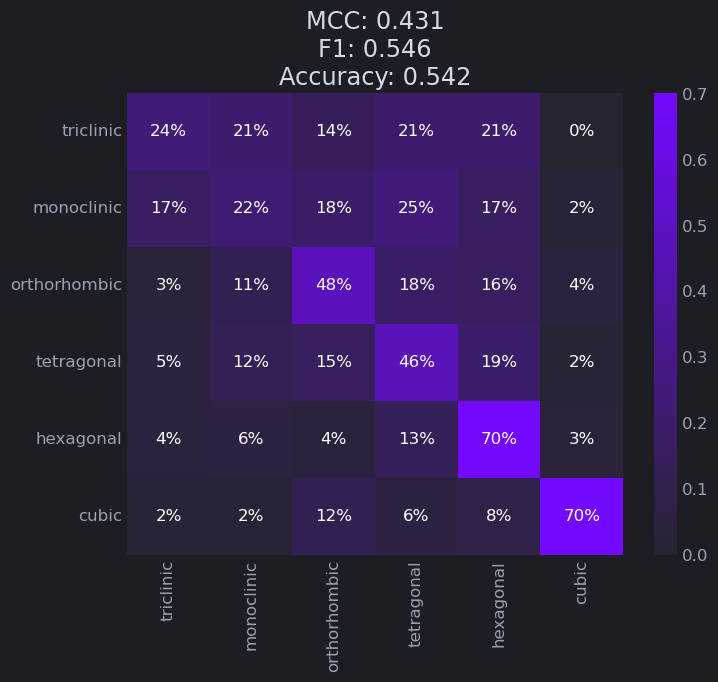

In [42]:
import seaborn as sns

palette = sns.color_palette('dark:#730aff', as_cmap=True)
pred_df = tabular_model.predict(df_valid, include_input_features=False)
import sklearn.metrics as metrics
y = df_valid['target']
preds = pred_df['prediction']

sample_weight = 1 / y.value_counts().loc[y] if use_resample else np.ones_like(y)
sample_weight /= np.sum(sample_weight)

order = ['triclinic', 'monoclinic', 'orthorhombic', 'tetragonal', 'hexagonal', 'cubic']
conf_mat = metrics.confusion_matrix(y, preds, labels=order, normalize='true').astype(float)
sns.heatmap(conf_mat, annot=True, xticklabels=order, yticklabels=order, cmap=palette, fmt='.0%')
plt.title('\n'.join([
    'MCC: {:.3f}'.format(metrics.matthews_corrcoef(y, preds, sample_weight=sample_weight)),
    'F1: {:.3f}'.format(metrics.f1_score(y, preds, average='weighted')),
    'Accuracy: {:.3f}'.format(metrics.accuracy_score(y, preds, sample_weight=sample_weight))
]))

In [ ]:
# import seaborn as sns
# palette = sns.color_palette('dark:#730aff', as_cmap=True)
# valid = df_valid[df_valid['target_group'].isin(df_train['target_group'])]
# pred_df = tabular_model.predict(valid, include_input_features=False)
# import sklearn.metrics as metrics
# y = valid['target_group']
# preds = pred_df['prediction']

# print('\n'.join([
#     'MCC: {:.3f}'.format(metrics.matthews_corrcoef(y, preds, sample_weight=sample_weight)),
#     'F1: {:.3f}'.format(metrics.f1_score(y, preds, average='weighted')),
#     'Accuracy: {:.3f}'.format(metrics.accuracy_score(y, preds, sample_weight=sample_weight))
# ]))

Output()

MCC: 0.377
F1: 0.357
Accuracy: 0.411


/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1239: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df[f"{class_}_probability"] = point_predictions[:, i]
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1239: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df[f"{class_}_probability"] = point_predictions[:, i]
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1239: Performan